<a href="https://colab.research.google.com/github/SUMER9999dev/unnamed-thingy/blob/main/pyda_itog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import scipy.stats as stats

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

импортируем данные

In [5]:
df = pd.read_csv('drive/MyDrive/HR.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Статистика по столбцам

In [ ]:
df[[
    'satisfaction_level', 'last_evaluation', 'number_project',
    'average_montly_hours', 'time_spend_company'
]].describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233
std,0.248631,0.171169,1.232592,49.943099,1.460136
min,0.090000,0.360000,2.000000,96.000000,2.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000


In [ ]:
df[['left', 'promotion_last_5years', 'department', 'salary']].agg('mode').T

,0
left,0
promotion_last_5years,0
department,sales
salary,low


In [ ]:
df[['left', 'promotion_last_5years']].mean()

left                     0.238083
promotion_last_5years    0.021268
dtype: float64

корреляционная матрица

In [ ]:
correlation_matrix = df[[
    'satisfaction_level', 'last_evaluation',
    'number_project', 'average_montly_hours', 'time_spend_company'
]].corr()
correlation_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


<Axes: >

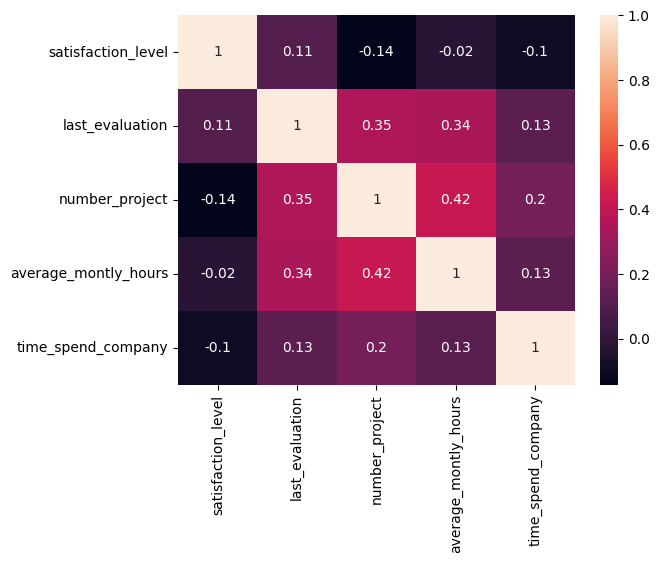

In [ ]:
sns.heatmap(correlation_matrix, annot=True)

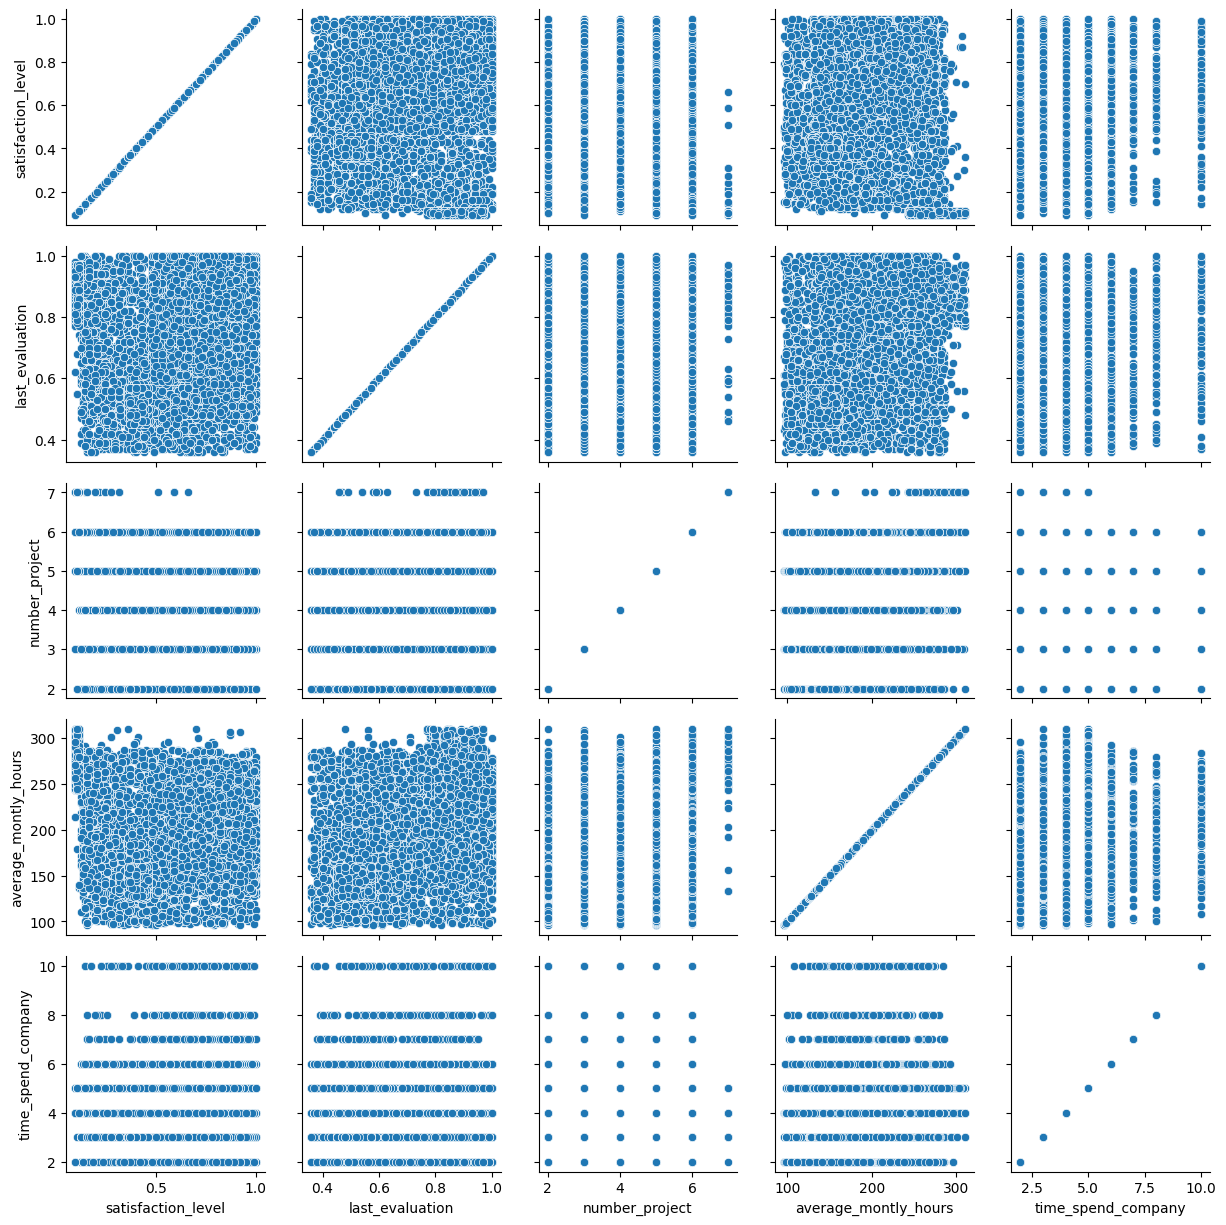

In [ ]:
pair_grid = sns.PairGrid(df[[
    'satisfaction_level', 'last_evaluation',
    'number_project', 'average_montly_hours', 'time_spend_company'
]])
pair_grid.map(sns.scatterplot)

Две самый коррелированные переменные - среднее количество часов в месяц и количество проектов

Две наименее коррелированные переменные - уровень удовлетворенности и среднее количество часов в месяц

In [ ]:
df.department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

<Axes: xlabel='salary', ylabel='count'>

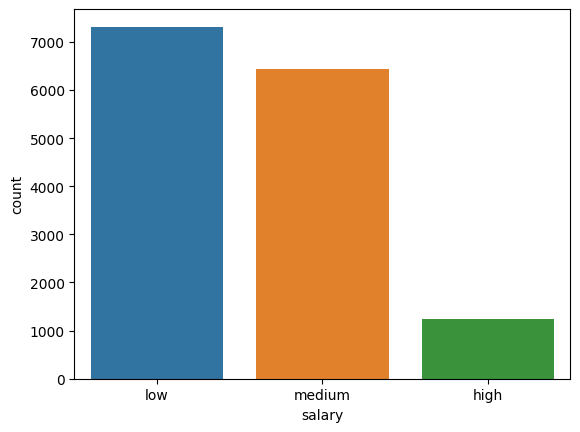

In [ ]:
sns.countplot(
    df,
    x='salary',
    order=['low', 'medium', 'high']
)

так как я не знаю, как визуализировать строками такие данные, превращу строки в числа


1. low
2. medium
3. high

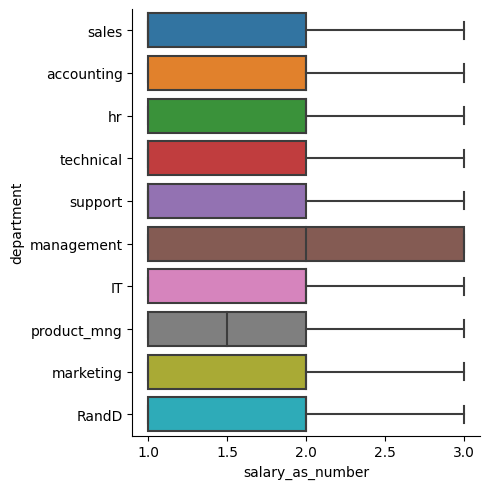

In [ ]:
convert_table = {'low': 1, 'medium': 2, 'high': 3}
df['salary_as_number'] = df.apply(lambda row: convert_table[row['salary']], axis=1)
sns.catplot(df, x='salary_as_number', y='department', kind='box', orient='h')

Проверим гипотезу, что сотрудники с большим окладом проводят на работе больше, чем сотрудники с маленьким

Оба распределения данных является нормальным, так что применим т-тест стьюдента для индивидуальных выборок с 95% уровнем доверия

H0 - количество времени на работе одинаково для обоих

H1 - количество времени на работе не одинаково для обоих

In [ ]:
low_salary_workers = df[df.salary == 'low']
high_salary_workers = df[df.salary == 'high']

In [ ]:
stats.shapiro(low_salary_workers.average_montly_hours).pvalue < 0.05 and stats.shapiro(high_salary_workers.average_montly_hours).pvalue < 0.05

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


True

In [ ]:
p_value = stats.ttest_ind(
    low_salary_workers.average_montly_hours,
    high_salary_workers.average_montly_hours
).pvalue

if p_value < 0.05:
    print('Отвергаем H0')
else:
    print('Не отвергаем H0')

Не отвергаем H0


Статистически вероятно для этих выборок, что количество рабочих часов для работников с низким окладом и высоким не отличается

In [ ]:
left_workers = df[df.left == 1]
not_left_workers = df[df.left == 0]

In [ ]:
left_workers_proportion = left_workers.promotion_last_5years.mean() * 100
not_left_workers_proportion = not_left_workers.promotion_last_5years.mean() * 100

print(
    'Пропорция сотрудников с повышением за последние 5 лет среди ушедших %',
    round(left_workers_proportion, 2)
)
print(
    'Пропорция сотрудников с повышением за последние 5 лет %',
    round(not_left_workers_proportion, 2)
)

Пропорция сотрудников с повышением за последние 5 лет среди ушедших % 0.53
Пропорция сотрудников с повышением за последние 5 лет % 2.63


In [ ]:
left_workers_mean_satisfaction_level = left_workers.satisfaction_level.mean()
not_left_workers_mean_satisfaction_level = not_left_workers.satisfaction_level.mean()

print(
    'Средний уровень удовлетворённости среди ушедших сотрудников',
    round(left_workers_mean_satisfaction_level, 2)
)
print(
    'Средний уровень удовлетворённости среди сотрудников',
    round(not_left_workers_mean_satisfaction_level, 2)
)

Средний уровень удовлетворённости среди ушедших сотрудников 0.44
Средний уровень удовлетворённости среди сотрудников 0.67


In [ ]:
left_workers_mean_number_project = left_workers.number_project.mean()
not_left_workers_mean_number_project = not_left_workers.number_project.mean()

print(
    'Среднее количество проектов среди ушедших сотрудников',
    round(left_workers_mean_number_project, 2)
)
print(
    'Среднее количество проектов среди сотрудников',
    round(not_left_workers_mean_number_project, 2)
)

Среднее количество проектов среди ушедших сотрудников 3.86
Среднее количество проектов среди сотрудников 3.79


Небольшой итог перед созданием модели LDA

* количество проектов у ушедших сотрудников немного больше (малое влияние на качество модели, по моему мнению)
* Средний уровень удовлетворённости у ушедших сотрудников значительно меньше (среднее влияние на качество модели, по моему мнению)
* Пропорция сотрудников с повышением за последние 5 лет среди ушедших очень меньше (большое влияние на качество модели, по моему мнению)

In [6]:
model = LinearDiscriminantAnalysis()

In [8]:
x = df[[
    'satisfaction_level', 'promotion_last_5years',
    'number_project', 'last_evaluation', 'time_spend_company'
]]
y = df.left

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
model.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [13]:
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.7423333333333333

In [28]:
model.coef_

array([[-4.55031396, -1.184133  , -0.15652087,  0.96336586,  0.22046019]])

Модель получилась хорошая, достаточно точно предсказывает

рейтинг влияние параметров:
1. satisfaction_level
2. promotion_last_5years
3. last_evaluation
4. time_spend_company
5. number_project